<a href="https://colab.research.google.com/github/federto/Sprint-01---02-/blob/main/Sprint_01_Proyect_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AnyoneAI - Project II

# Making Estimations with our NBA dataset

In our first project, we learn how to create our own datasets by using a public API, Python and Pandas. We're now going to explore how to make predictive models for regression and classification tasks using ScikitLearn

The goals of this project are:
- Learn how to define a prediction task
- Selecting evaluation metrics and baseline models
- Perform feature engineering and standarization
- Training and using predictive models: Univariable and Multivariate Linear Regression, Classification
- Understand how Gradient Descent works by implementing a Linear Regressor in python

##1. Using Regression Models to Estimate players Salaries

A player's salary can be explained by a lot of factors: 

- Years in the league: NBA contracts are limited in price, players have caps on how much money they make depending on their years playing in the league
- Age: Highly correlated to the previous one, NBA players have a minimun age of 19 years
- Draft position: players out of USA universities are selected each year through a process called draft, in which each team selects a player in a predefined order for 2 rounds (meaning only 60 players are drafted each year). A rookie contract value depends on the draft position. (Undrafted players have to negotiate a salary independently)
- Performance in statistical categories: after the rookie contract, players can negotiate freely with teams, and usually statistical categories like points, rebounds and assists are extremely important.  
- Team: Even though there are limits to what all teams can expend in players salary, they all allocate their resources differently, and can be more willing to pay the penalties incurred by exceeding those limitations.
- Year in which the contract was signed: the mininum and maximum values of contracts possibles in the NBA changes depending on league revenue (television contracts, sponsorships, etc), so if the amount of money the teams make increases, players can negotiate bigger contracts.
- Intangibles: players can be valued also in things that are not easily translated to a statistic, good defensive players might not always have great stats but can be extremely important for a team, the same can be said about veteran players that help young ones to learn and are good locker-room guys.

But we're going to take a simplified approach, we'll try to use the data we already have to make the best estimator possible, and then we will analyze what went right and what could've gone wrong with our results.

###Analyzing our data

In [ ]:
# import the libraries

import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator


In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/project2_players_df.csv")
data.dropna(subset=["PTS"], inplace=True)

In [ ]:
  list1 = []
  list2 = []
x = data.BIRTHDATE.dropna()
for val in x.str.split("-"):
  if val[1] == "05":
    list1.append(val[0:2])
  else: 
    list2.append(val[0:2]) 

In [ ]:
output1 = {}
output2 = {}
for k, *v in list1:
    output1.setdefault(k, []).extend(v)
for k, *v in list2:
    output2.setdefault(k, []).extend(v)

{'1999': ['09',
  '09',
  '03',
  '11',
  '04',
  '07',
  '11',
  '11',
  '10',
  '07',
  '04',
  '04',
  '02',
  '02',
  '04',
  '09',
  '07',
  '10',
  '01',
  '03',
  '10',
  '06',
  '07',
  '08',
  '10',
  '07',
  '04',
  '06',
  '06',
  '09',
  '06',
  '08',
  '01',
  '10',
  '06',
  '01',
  '04',
  '01',
  '09'],
 '1993': ['07',
  '09',
  '06',
  '01',
  '02',
  '08',
  '01',
  '03',
  '04',
  '08',
  '07',
  '10',
  '06',
  '04',
  '06',
  '02',
  '09',
  '01',
  '06',
  '01',
  '06',
  '01',
  '06',
  '09',
  '09',
  '12',
  '04',
  '09'],
 '1997': ['07',
  '07',
  '10',
  '07',
  '04',
  '07',
  '09',
  '11',
  '01',
  '06',
  '02',
  '07',
  '12',
  '12',
  '12',
  '09',
  '10',
  '02',
  '07',
  '02',
  '07',
  '03',
  '02',
  '06',
  '08',
  '11',
  '03',
  '11',
  '12',
  '07',
  '03',
  '04',
  '03'],
 '2001': ['01',
  '01',
  '08',
  '08',
  '11',
  '09',
  '02',
  '12',
  '09',
  '08',
  '02',
  '07',
  '12',
  '01',
  '04',
  '06',
  '02',
  '01',
  '06',
  '01',
  '01

Let's have another look at our previously generated dataset. 

In [ ]:
data['Salary']

0       2711280
1      17073171
2      28103550
3       1994520
4       2641691
         ...   
455    14190000
456     8326471
457     1489065
458     2389641
459     7518518
Name: Salary, Length: 459, dtype: int64

1.1. Plot all players statistics ("PTS", "REB", "AST","STL","BLK") against salary

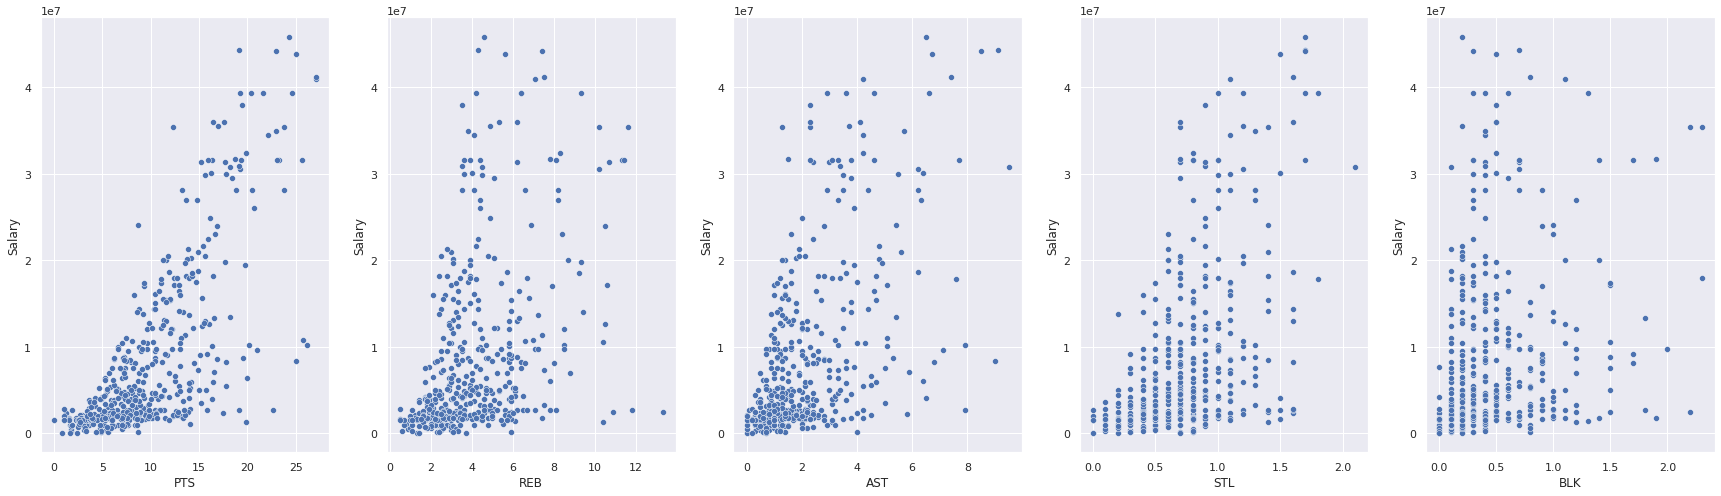

In [ ]:
# Plot the relationship between the salary and the following variables:"PTS", "REB", "AST","STL","BLK"

df = pd.DataFrame(data)

sns.set(rc={'figure.figsize':(30,8)})

fig, axs = plt.subplots(ncols=5)

sns.scatterplot(data = df, x="PTS", y="Salary", ax = axs[0])
sns.scatterplot(data = df, x="REB", y="Salary", ax = axs[1])
sns.scatterplot(data = df, x="AST", y="Salary", ax = axs[2])
sns.scatterplot(data = df, x="STL", y="Salary", ax = axs[3])
sns.scatterplot(data = df, x="BLK", y="Salary", ax = axs[4])

1.2. What can we say about these distributions?

In [ ]:
# As we can see with the .corr() function, the strongest relationships with salary are 1 PTS / 2 AST / 3 STL / 4 REB / 5 BLK

df[["Salary","PTS","REB","AST","STL","BLK"]].corr()

,Salary,PTS,REB,AST,STL,BLK
Salary,1.000000,0.732907,0.435228,0.560400,0.532968,0.241079
PTS,0.732907,1.000000,0.566228,0.675474,0.629975,0.273726
REB,0.435228,0.566228,1.000000,0.214233,0.356387,0.714334
AST,0.560400,0.675474,0.214233,1.000000,0.727288,-0.074422
STL,0.532968,0.629975,0.356387,0.727288,1.000000,0.141599
BLK,0.241079,0.273726,0.714334,-0.074422,0.141599,1.000000


### Splitting the Dataset

1.3. Split the dataset into train and testing sets. Use the Sklearn function for train/test splitting. Make sure to set the random state for reproducibility.

**Note:** Before using scikit-learn `train_test_split()`, separate your dataframe into features and labels. Assign your features to `X` variable and labels to `y`.

In [ ]:
# TODO: Put here your features
X = df.iloc[:, df.columns != "Salary"]

# TODO: Put here your labels
y = df["Salary"]

# TODO: Now use train_test_split()
Xtr , Xte, Ytr, Yte = train_test_split(X, y, test_size=0.8, random_state=42)

### *Don't change anything in this cell, just make it run correctly*

In [ ]:
if X.SEASON_EXP[322] == 3 and y[255] == 5000000:
  print('Success!')
else:
  raise ValueError('The draft categories are incorrect, please review your function')

if X.shape == (459, 19) and y.shape == (459,):
  print('Success!')
else:
  raise ValueError('Your features/labels shape is incorrect, please review your code')


Success!
Success!


### Baseline Model and Evaluation Metric

In every project, we need a baseline model that implements a very simple algorithm or heuristic so we can compare our results with it. 
In this case, we could create a function that always returns the average player salary, evaluate that, and then compare the result with our modeling to see if we are improving. 

We need an evaluation metric to see how well our models fit the data. For this project we will use [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) as our regression evaluation metric, because it is a really simple metric to interpret. A lower value means the model performs better. 

For this particular problem, we will always round the value, as we don't need decimals for this task.

1.4. Create a Baseline model class that implements  fit() and predict() methods. As this model will not consider any other variable, the fit method should only receive a list of all players salaries. The predict method should receive and iterable and return a numpy array with the same length but every element should have the same value (the average salary)

In [ ]:

class BaselineModel():
  """
  A baseline model that always returns the same value, the mean of the 
  players salary in the train data
  """
  
  def fit(self, y_train):
    """
    Fit the training data. 
    
    Parameters
    ----------
    y_train: Union[pd.Series, np.ndarray]
        a pandas series or numpy array containing salary information
    """
    
    self.avg = y_train.mean()
  
  def predict(self, X):
    """
    Predict salaries 
    
    Parameters
    ----------
    X: Union[pd.DataFrame, pd.Series, np.ndarray]
        a pandas series, dataframe or numpy array with the 
        
    Returns
    -------
    np.ndarray
        a numpy array of the same length as X, with all elements equal to 
        the mean salary calculated in fit()
    """

    shape = X.shape
    
    array = np.full(shape[0], self.avg)
    
    return array

1.5. Evaluate the performance of our BaselineModel on the test set using mean_absolute_error from Sklearn (round the result)

In [ ]:
# Check the error of our basic baseline

bas_mod = BaselineModel()

bas_mod.fit(Ytr)

y_prediction = bas_mod.predict(X)

error = mean_absolute_error(y , y_prediction)

error = round(error)

baseline_mae = error

baseline_mae 

7230289

### Regression with a single variable

You're now going to start modeling data. We will start with a really simple approach, selecting just one variable, and doing a regression to see if we improve upon our baseline.


1.6. Select the variable you think would provide the best fit. Perform feature scaling on this variable using a Sklearn scaler.

In [ ]:
# Scale the values ​​of the PTS column

df_reshape_pts = Xtr["PTS"].values.reshape(-1, 1)

scaler = StandardScaler()

Xtr_1 = scaler.fit_transform(df_reshape_pts)

Ytr_1  = Ytr.values.reshape(-1, 1)

1.7. Train a model with [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) from Sklearn using the default parameters. Evaluate the model's performance on the test set using the selected metric.

In [ ]:
# Train the SGDRegressor model with the scaled variables

sgdr = SGDRegressor()

sgdr.fit(Xtr_1, Ytr_1.ravel())

y_prediction_1 = sgdr.predict(Xtr_1)

error_1 = mean_absolute_error(Ytr_1 , y_prediction_1)

error_1

4663742.589804683

1.8. Read the Sklearn documentation, and write a function that tries different configurations for the hyperparameters for training: epochs, learning rate and alpha. For each combination of parameters, evaluate the trained algorithm on the test set, then save the results of each hyperparameter combination, finally select the one that has the best MAE (meaning the lowest number) and print the combination and the MAE.

In [ ]:
def search_best_hyperparameters(max_iter, eta0, Xtr, Ytr):
  
  
  # List where we gonna save all the combinations
  
  empty_list = []


  # List where we gonna save the maes 
  
  min_mae_list = []

  
  # Loop making all the combinations of hyperparameters in the SGDRegressor model

  for val in max_iter:
    
    a = val
    
    for val in eta0:

        b = val
    
        sgdr = SGDRegressor(max_iter = a , learning_rate = "adaptive", eta0 = b, random_state = 42) 
  
        sgdr.fit(Xtr, Ytr.ravel())
  
        y_prediction = sgdr.predict(Xtr)
  
        error_1 = mean_absolute_error(Ytr , y_prediction)

        listval = [a, b, error_1]

        empty_list.append(listval)

  
  # Getting the best hyperparameters
  for val in empty_list: 

    x = val[2]
    
    min_mae_list.append(x)

  min_mae_real =  min_mae_list.index(min(min_mae_list))
  
  result_values  = empty_list[min_mae_real]
  
  result = {
    "hyperparameters": {"max_iter": result_values[0], "eta0": result_values[1]}, 
    "mae": result_values[2] } 
    
  return result

In [ ]:
best_mae = search_best_hyperparameters([1000,100000,1000000], [0.0001, 0.001, 0.01, 0.1, 1], Xtr_1, Ytr_1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# Example list of hyperparameters values
max_iter = [1000, 1000000]
eta0 = [0.0001, 0.001, 0.01, 0.1]

result = search_best_hyperparameters(max_iter, eta0, Xtr_1, Ytr_1)
print(result)

{'hyperparameters': {'max_iter': 1000, 'eta0': 0.0001}, 'mae': 4663056.73301243}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


1.9. Compare the results of the baseline, the SGDRegressor with default parameters and the one with the best combination of hyperparameters you could find. (replace variables with the ones you used)

In [ ]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {error_1}")
print(f"Best SGDRegressor: {best_mae}")

Mean Absolute Error for each model:
Baseline: 7340760
Default SGDRegressor: 4663742.589804683
Best SGDRegressor: {'hyperparameters': {'max_iter': 1000, 'eta0': 0.0001}, 'mae': 4663056.73301243}


### Multivariate Linear Regression

To improve our model, we will add more features to it. We will have to do some processing to our dataset to be able to use the data.
We'll start with the following variables:

- Points
- Rebounds
- Assists
- Blocks
- Experience
- Position
- Draft Number


1.10. Create a copy of the dataset generated in the first project that only has the following columns (and player id as an index) and name it mv_regression_df:

["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "SALARY"]

In [ ]:
# TODO: Complete here
mv_regression_df = df[["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "Salary", "PERSON_ID"]]
mv_regression_df = mv_regression_df.set_index("PERSON_ID")

### *Don't change anything in this cell, just make it run correctly*

In [ ]:
if mv_regression_df.shape == (459, 8):
  print('Success!')
else:
  raise ValueError('The shape is incorrect, please review your function')

Success!


#### Feature Engineering

1.11. Binning the DRAFT_NUMBER feature. Draft position directly impacts salaries during the first few years, but second round players and undrafted players don't have guaranteed contracts. So we're gonna divide the bins like this: 

       - 1 to 15: firstround_lottery
       - 15 to 30: firstround_non_lottery
       - 30 to 60: second_round
       - Undrafted: undrafted
       
Create a new column named DRAFT using these 4 categories. Drop the draft number column.

In [ ]:
# Take the necessary actions to be able to create the draft column
mv_regression_df["DRAFT_NUMBER"].fillna("Undrafted", inplace =  True)
mv_regression_df["DRAFT_NUMBER"].replace("Undrafted", 0, inplace =  True)
mv_regression_df["DRAFT_NUMBER"] = mv_regression_df["DRAFT_NUMBER"].astype("int")

In [ ]:
# We create the draft column with its respective intervals between pick numbers
labels = ['undrafted', 'firstround_lottery', 'firstround_non_lottery', 'second_round']
bins = [-1 , 1, 15, 30, 60]
mv_regression_df["DRAFT"] = pd.cut(mv_regression_df["DRAFT_NUMBER"], bins = bins, labels=  labels)

### *Don't change anything in this cell, just make it run correctly*

In [ ]:
if mv_regression_df["DRAFT"].iloc[34] == 'firstround_non_lottery' and mv_regression_df["DRAFT"].iloc[105] == 'undrafted':
  print('Success!')
else:
  raise ValueError('The draft categories are incorrect, please review your function')

Success!


1.12. Encode the categorical features: DRAFT, POSITION

In [ ]:
# Encode the categorical features in Draft and Position
mv_regression_df = pd.get_dummies(mv_regression_df, columns = ["DRAFT", "POSITION"] )

### *Don't change anything in this cell, just make it run correctly*

In [ ]:
if mv_regression_df["DRAFT_firstround_non_lottery"].iloc[134] == 0 and mv_regression_df["POSITION_Forward"].iloc[205] == 1:
  print('Success!')
else:
  raise ValueError('The draft categories are incorrect, please review your function')

Success!


#### Modeling

1.13. Split the dataset into train and test. 


**Note 1:** Before using scikit-learn `train_test_split()`, separate your dataframe into features and labels. Assign your features to `X` variable and labels to `y`.

**Note 2:** Remember to drop `DRAFT_NUMBER` column.

In [ ]:
# Eliminate the Draft_number column
mv_regression_df = mv_regression_df.drop(columns= "DRAFT_NUMBER")

In [ ]:
# TODO: Put here your features
X = mv_regression_df[["PTS", "REB", "AST", "BLK",	"SEASON_EXP",	"DRAFT_undrafted", "DRAFT_firstround_lottery", "DRAFT_firstround_non_lottery", "DRAFT_second_round", "POSITION_Center",	"POSITION_Forward",	"POSITION_Guard"]]

# TODO: Put here your labels
y = mv_regression_df["Salary"]

# TODO: Now use train_test_split()
Xtr_2, Xte_2, Ytr_2, Yte_2 = train_test_split(X, y, test_size=0.7, random_state=42)

### *Don't change anything in this cell, just make it run correctly*

In [ ]:
if X.BLK.iloc[353] == 0.1 and y.iloc[400] == 4910000:
  print('Success!')
else:
  raise ValueError('The draft categories are incorrect, please review your function')

Success!


1.14. Perform feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number (which we will tackle next).

In [ ]:
# Feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number 
cols_names = ["PTS", "REB", "AST", "BLK", "SEASON_EXP"]

for col in cols_names:
    
    reshape = Xtr_2[col].values.reshape(-1, 1)

    scaler = StandardScaler()

    scaler.fit(reshape)

    reshape_column = scaler.transform(reshape)

    Xtr_2[col] = reshape_column


1.15. Write a function to train a SGDRegressor model with the new dataset, trying different hyperparameters, and selecting the one that performs the best.

In [ ]:
def search_best_hyperparameters_2(max_iter, eta0_, Xtr, Ytr):
  
  empty_list = []

  min_mae_list = []
  
  # Loop to get the best hyperparameters
  for val in max_iter:
    
    a = val
    
    for val in eta0:

        b = val
    
        sgdr = SGDRegressor(max_iter = a , learning_rate = "adaptive", eta0 = b, random_state = 42) 
  
        sgdr.fit(Xtr, Ytr)
  
        y_prediction = sgdr.predict(Xtr)
  
        error_1 = mean_absolute_error(Ytr , y_prediction)

        listval = [a, b, error_1]

        empty_list.append(listval)


  # Get the best hyperparameters
  for val in empty_list: 

    x = val[2]
    
    min_mae_list.append(x)

  min_mae_real =  min_mae_list.index(min(min_mae_list))
  
  result_values  = empty_list[min_mae_real]
  
  result = {
    
    "hyperparameters": {"max_iter": result_values[0], "eta0": result_values[1]}, 
    "mae": result_values[2] } 
    
  return result

In [ ]:
best_mae_pluvariate = search_best_hyperparameters_2([100000, 1000000, 100000000], [0.0001, 0.001, 0.01, 0.1, 1], Xtr_2, Ytr_2)


In [ ]:
best_mae_pluvariate

{'hyperparameters': {'max_iter': 100000, 'eta0': 0.1},
 'mae': 4582517.6413266305}

1.16. How did the model performed compared to our univariate models? 

Worse we get a higher mae value

### DecisionTreeRegressor

It is possible that this problem might not be easily resolvable by a linear model, or that there could be better types of algorithms to tackle it. As an example, let's try with a very used algorithm, a Decision Tree.



1.17. Create new model using [DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) from scikit learn. We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. Read the documentation to get a better grasp of what each one does.

In [ ]:
# List of hyperparameter example values
max_depth = [5, 10, 15, 20, 50]
min_samples_leaf = [2, 10, 20, 50]
max_features = [5, 10]

In [ ]:
def search_best_hyperparameters_tree(max_depth, min_samples_leaf, max_features, Xtr, Ytr):
  
  empty_list = []

  min_mae_list = []
  
  # Loop to get the best hyperparameters values
  for val in max_depth:
    
    a = val
    
    for val in min_samples_leaf:

        b = val
        
        for val in max_features:

          c = val
          
          regr = DecisionTreeRegressor(max_depth= a, min_samples_leaf = b ,max_features = c, random_state = 42)
        
          regr.fit(Xtr, Ytr)
        
          y_prediction = regr.predict(Xtr)
        
          error = mean_absolute_error(Ytr , y_prediction)

          listval = [a, b, c, error]

          empty_list.append(listval)

  # Get the best hyperparameters
  for val in empty_list: 

    x = val[3]
    
    min_mae_list.append(x)

  min_mae_real =  min_mae_list.index(min(min_mae_list))
  
  result_values  = empty_list[min_mae_real]
  
  result = {
    
    "hyperparameters": {"max_depth": result_values[0], "min_samples_leaf": result_values[1], 
    "max_features" : result_values[2]}, "mae": result_values[3] } 
    
  return result

In [ ]:
# Fit regression model
mae_tree = search_best_hyperparameters_tree(max_depth, min_samples_leaf, max_features, Xtr_2, Ytr_2)

1.18. Compare the results obtained with the best decision tree model against the baseline, default and the best params sgd regressors-

In [ ]:
print(best_mae_pluvariate)
print(mae_tree)

{'hyperparameters': {'max_iter': 100000, 'eta0': 0.1}, 'mae': 4582517.6413266305}
{'hyperparameters': {'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 10}, 'mae': 1194781.1678832117}


### Analyzing our results

Based on what you found, and what you read about players salaries above, answer the following: 

1.19. Which kind of model worked better in this dataset, linear or non linear models? Do you have any hypothesis about why? 

No linear models because we have to many variables

1.20. Is there something else we could do to improve our results if wanted to make a more accurate model?

Maybe we can reduce the variables

##2. Star or no Star? Predicting players All-NBA selections

In this section we're going to try to solve a different question:

Can we train a model to predict which players are going to be selected to ALL-NBA teams at the end of the season? This is a [binary classification](https://en.wikipedia.org/wiki/Binary_classification) task, so we're training our first classifier model to solve this problem.

Consider that:

- Being selected as part of the [All-NBA teams](https://en.wikipedia.org/wiki/All-NBA_Team) is different than being selected for [All-Star Game](https://en.wikipedia.org/wiki/NBA_All-Star_Game). 
- You're trying to predict All-NBA selections, which takes place after the regular season but before playoffs start, so we're only going to use players and teams statistics about the regular season (you're not going to consider if the players got to the NBA finals for example). 
- All Star game takes place at the middle point of the regular season, players are selected based on partial season performance, and the general public has 50% of the votes, so it is also a more popularity-based award.
- All-NBA teams are divided in first, second and third teams of 5 players each, divided by position: 2 front court players (guards), 2 backcourt players (forwards) and 1 center.
- As only 15 players are selected to All-NBA teams each year (out of more than 400 qualifying players), our dataset is going to be imbalanced. You're going to have to find a good strategy to deal with this inbalance.

###Analyzing the data

To do this task, you're going to need historical information about All-NBA selections. We'll use a dataset that contains information about players from season starting in 1990 and ending in the 2018-2019 season.
The dataset contains statistics for all players, and a column named "all-nba" that is going to be our target variable, 1 means the player was selected to an All-NBA team that season.


2.1. Load the dataset "all_nba_1990_2017_dataset.csv" from disk, look at the data inside it and print:
- number of rows
- number of seasons
- number of unique players
- number of all-nba selections vs non selected 

In [ ]:
import pandas as pd
all_nba_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_1990_2017_dataset.csv", index_col=0)

### Splitting the dataset

2.2. Split the dataset in training and test sets. Make sure to keep the distribution of values in the target variable.

Use columns: 'team', 'games', 'games_started', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba'.

**Note:** Assign your features to `X` variable and labels to `y`.



In [ ]:
df1 = pd.DataFrame(all_nba_df)

In [ ]:
# Get the columns that we need
df1 = df1[['team', 'games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc', '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba']]

In [ ]:
# TODO: Put here your features
X = df1[['team', 'games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc', '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']]
# TODO: Put here your labels
y = df1['all_nba']

# TODO: Now use train_test_split()
Xtr_3, Xte_3, Ytr_3, Yte_3 = train_test_split(X, y, test_size=0.5, random_state=42)

### *Don't change anything in this cell, just make it run correctly*

In [ ]:
if X.shape == (14825, 15) and y.shape == (14825,):
  print('Success!')
else:
  raise ValueError('Your features/labels shape is incorrect, please review your code')


Success!


### Baseline model and Evaluation Metrics

In this oportunity we'll define our baseline model as the model we can train with the minimun amount of work on the dataset. For this you're gonna train a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with default parameters, and without doing any preprocessing to our data.

2.3. Let's start with a simple test. What accuracy would we get if we had a baseline model that always predicted 0 (player not selected to all nba)?

In [ ]:
# Baseline model that always predicted 0 
shape = Xtr_3.shape
    
array2 = np.full(shape[0], 0)

In [ ]:
# Mae
error3 = accuracy_score(Ytr_3 , array2)
error3

0.9637075013491635

2.4. What does this tells us about the data and the use of accuracy as an evaluation metric?

The data is unbalanced, so we get to many accuracy

2.5. Scale all numerical features in the dataset (we will keep this scaling for future modeling, so make sure to do it in place)

In [ ]:
# Scale all numerical features in the dataset 
cols_names2 = ["games", "gamesstarted", "mp", "fg_perc", "3p_perc", "2p_perc", "ft_perc", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]

for col in Xtr_3[cols_names2]:
    
    reshape = Xtr_3[col].values.reshape(-1, 1)

    scaler = StandardScaler()

    scaler.fit(reshape)

    reshape_column = scaler.transform(reshape)

    Xtr_3[col] = reshape_column

2.6. Train a LogisticRegression with default parameters, use only the numerical features (omit the team information for now). This will be our baseline model. 

In [ ]:
# Train a LogisticRegression with default parameters
Xtr_3_numerical = Xtr_3[["games", "gamesstarted", "mp",	"fg_perc",	"3p_perc",	"2p_perc",	"ft_perc",	"trb",	"ast",	"stl",	"blk",	"tov",	"pf",	"pts"]]

lgr = LogisticRegression() 

lgr.fit(Xtr_3_numerical, Ytr_3)

y_prediction_2 = lgr.predict(Xtr_3_numerical)

error4 = mean_absolute_error(Ytr_3 , y_prediction_2)

error4

0.01834862385321101

2.7. Evaluate our baseline model using this metrics: 

    - accuracy
    - precision
    - recall
    - f1

In [ ]:
# Calculate the accuracy, precision, recall and f1
accuracy = accuracy_score(Ytr_3, y_prediction_2)

precision =  precision_score(Ytr_3, y_prediction_2)

recall = recall_score(Ytr_3, y_prediction_2)

f1 = f1_score(Ytr_3, y_prediction_2)
print("accuracy :", accuracy)
print("precision :", precision)
print("recall :", recall)
print("f1 :", f1)

accuracy : 0.981651376146789
precision : 0.8064516129032258
recall : 0.6505576208178439
f1 : 0.720164609053498


From now on, you'll be evaluating you model primarily using the F1 Score metric, but we also want to avoid models that have very low recall. 

### Classification

#### Feature engineering

2.8. One hot encode the Team feature. Make sure to drop the original column.

In [ ]:
# One hot encode the Team feature
Xtr_3["team"]= Xtr_3["team"].astype("category")
Xtr_3 = pd.get_dummies(Xtr_3, columns = ["team"])

#### Modeling

2.9. Train a logistic regresion model, find the best hyperparameters for: tols, C and max_iter. Try at least 4 values of each parameter. Remember to select based on f1 score, but report also precision and recall. Save the best performing model to use in the next steps.

In [ ]:
def log_regr_model(Xtr, Ytr, tols, C, max_iter):
  
  empty_list = []
  
  min_f1_list = []
  
  # Looping for the best hyperparameters
  for val in tols:
    
    a = val

    for vals in C:
        
      b = vals

      for values in max_iter:
        
        d = values

        lgr = LogisticRegression(tol = a, C = b, max_iter = d, random_state = 42) 
        
        lgr.fit(Xtr , Ytr)
        
        y_prediction = lgr.predict(Xtr)
        
        precision =  precision_score(Ytr, y_prediction)
        
        recall = recall_score(Ytr, y_prediction)
        
        f1 = f1_score(Ytr, y_prediction)
        
        listval = [a, b, d, precision, recall, f1]

        empty_list.append(listval)

  
  # Getting the best hyperparameters to f1
  for i in empty_list: 

    x = i[5]
    
    min_f1_list.append(x)

  min_f1_real =  min_f1_list.index(min(min_f1_list))
  
  result  = empty_list[min_f1_real]

  return  result

In [ ]:
tols_values = [0.000001, 0.0000001, 0.000000001, 0.0000000001]
C_values = [1, 2, 3, 4]
max_iter_values = [1000, 10000, 100000, 1000000]
f1_best_value = log_regr_model(Xtr_3, Ytr_3, tols_values, C_values, max_iter_values)

In [ ]:
f1_best_value 

[1e-06, 1, 1000, 0.8434782608695652, 0.7211895910780669, 0.7775551102204409]

#### Evaluating on New Data

You're now going to evaluate the results on a test dataset that has not being used to train or do hyperparameter tuning, this is sometimes known as a Test set (in this cases the test set used for training is known as validation set, yeah, it's confusing, but you can read about it [here](https://machinelearningmastery.com/difference-test-validation-datasets/))

2.10. Load the dataset [all_nba_2018_dataset.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv) in one dataframe and [all_nba_2018_selections.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv)) in another, then:

    - Scale the numerical features. Columns season_id, player_id, player_season, player, season and season_start will not be used for prediction, you can keep them but remember not to pass them to the classifier.
    
    - Create the one hot encoded features for team. This step will be complex, as you will have to consider that in the 2018 season there are 30 teams, but the previous dataset contains 40 teams, that is because a lot of teams changed names or cities over the years. You need to add those 10 different team names in this dataset (with all values in 0) to make the classifier work.

In [ ]:
all_nba_2018_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv", index_col=0)
all_nba_2018_selections = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv", index_col=0)

In [ ]:
all_nba_2018_df1 = all_nba_2018_df[['team', 'games', 'gamesstarted', 'mp', 'fg_perc','3p_perc', '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov','pf', 'pts']]

In [ ]:
# Scale the numerical features
cols_names3 = [ 'games', 'gamesstarted', 'mp', 'fg_perc','3p_perc', '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov','pf', 'pts']

for col in all_nba_2018_df1[cols_names3]:
    
    reshape = all_nba_2018_df1[col].values.reshape(-1, 1)

    scaler = StandardScaler()

    scaler.fit(reshape)

    reshape_column = scaler.transform(reshape)

    all_nba_2018_df1[col] = reshape_column


In [ ]:
all_nba_2018_df_copy = all_nba_2018_df1.copy()


In [ ]:
# Encode the teams columns
all_nba_2018_df1 = pd.get_dummies(all_nba_2018_df1, columns = ["team"])

In [ ]:
# Making the columns of the dfs equals
old_teams = df1["team"].unique()  
new_teams = all_nba_2018_df["team"].unique()
difference = set(old_teams) - set(new_teams)

list(difference) 

for cols in difference:
    all_nba_2018_df1[cols] = 0

diccionario_columns = {'WSB' : "team_WSB", 'NOH' : "team_NOH", 'VAN' : "team_VAN", 'SEA' : "team_SEA", 'SDC' : "team_SDC", 'CHH' : "team_CHH", 'NOK' : "team_NOK", 'CHA' : "team_CHA", 'KCK' : "team_KCK", 'NJN': "team_NJN"}

all_nba_2018_df1.rename(columns = diccionario_columns, inplace = True)
all_nba_2018_df1.drop(columns = ["team_TOT"], inplace =  True)


### *Don't change anything in this cell, just make it run correctly*

In [ ]:
if all_nba_2018_df1.shape == (530, 54):
  print('Success!')
else:
  raise ValueError('The shape is incorrect, please review your function')

Success!


In [ ]:
#  Making the columns of the dfs equals order
all_nba_2018_df1 = all_nba_2018_df1[['games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc', '2p_perc',
       'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'team_ATL',
       'team_BOS', 'team_BRK', 'team_CHA', 'team_CHH', 'team_CHI', 'team_CHO',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GSW', 'team_HOU',
       'team_IND', 'team_KCK', 'team_LAC', 'team_LAL', 'team_MEM', 'team_MIA',
       'team_MIL', 'team_MIN', 'team_NJN', 'team_NOH', 'team_NOK', 'team_NOP',
       'team_NYK', 'team_OKC', 'team_ORL', 'team_PHI', 'team_PHO', 'team_POR',
       'team_SAC', 'team_SAS', 'team_SDC', 'team_SEA', 'team_TOR', 'team_UTA',
       'team_VAN', 'team_WAS', 'team_WSB']]

2.11. Predict and evaluate the model using precision, recall and f1 score. 

In [ ]:
# Droping no team values
Xtr_3.drop(columns = ["team_TOT"], inplace =  True)

In [ ]:
# Training the model and compare to the another 
lgrs =  LogisticRegression(tol = 1e-06 , C = 1, max_iter = 1000, random_state = 42) 

lgrs.fit(Xtr_3 , Ytr_3)

y_prediction_4 = lgrs.predict(all_nba_2018_df1)

all_nba_2018_selections_prob_list = lgrs.predict_proba(all_nba_2018_df1)

precision_2 =  precision_score(all_nba_2018_selections['all_nba'], y_prediction_4)

recall_2 = recall_score(all_nba_2018_selections['all_nba'], y_prediction_4)

f1_2 = f1_score(all_nba_2018_selections['all_nba'], y_prediction_4)

print("precision 1 = ", precision, " precision 2 = ", precision_2)
print("recall 1 = ", recall, " recall 2 = ", recall_2)
print("f1 1 = ", f1, " f1 2 = ", f1_2)

precision 1 =  0.8064516129032258  precision 2 =  0.6521739130434783
recall 1 =  0.6505576208178439  recall 2 =  1.0
f1 1 =  0.720164609053498  f1 2 =  0.7894736842105263


2.12. Analyze the results, what do you think it is happening?

In [ ]:
 # Aumenta mucho el recall, baja la precision en menor medida haciendo que nuestro f1 aumente ligeramente

In [ ]:
# For a later use in 2.17
all_nba_2018_df_copy = all_nba_2018_df_copy.drop(columns= "team")

#### Creating our custom Classifier

One thing to consider in this problem, is that the number of ALl NBA selections is fixed each year, a total of 15 players are always selected. But our current model does not limit the number of positive classified players. So, we will have to wrap our model in a custom classifier that only returns as positive the 15 players with the higher probabilities. 
Fortunately, our chosen model provides access to the underlying probabilities.

2.13. Using the trained model, predict probabilities for all rows in the dataset, and create a new column that has the probability that the player was selected as all nba. Round the probability to 3 decimals.

In [ ]:
# Creating the probabilities column
prob_col = []

for val in all_nba_2018_selections_prob_list:
 prob_col.append(round(val[1], 3))

all_nba_2018_selections["prob"] = prob_col

2.14. Sort the dataset by probabilities and show the 15 players with higher probability to have been selected

In [ ]:
# Top 15 players with most probabilities
df_top_15 = all_nba_2018_selections.sort_values(["prob"], ascending = False ).head(15)
df_top_15

,player_id,player,all_nba,prob
5604,1024,James Harden,1,0.999
453,83,Giannis Antetokounmpo,1,0.998
6857,1240,LeBron James,1,0.995
14479,2648,Russell Westbrook,1,0.988
3401,587,Anthony Davis,0,0.984
4145,740,Joel Embiid,1,0.971
14027,2572,Nikola Vucevic,0,0.947
3908,695,Kevin Durant,1,0.937
4895,884,Paul George,1,0.933
168,30,LaMarcus Aldridge,0,0.881


2.15. Print:

    - Players actually selected from the all_nba_2018_selections dataset,
    - Players actually selected missing from OUR predictions
    - Players in our predictions not selected 

In [ ]:
print("Players actually selected from the all_nba_2018_selections dataset : " ,all_nba_2018_selections["player"].loc[all_nba_2018_selections["all_nba"] == 1])
print("Players actually selected missing from OUR prediction : ", all_nba_2018_selections["player"].loc[(all_nba_2018_selections["all_nba"] == 1) & (all_nba_2018_selections['prob'] < 0.738)])
print("Players in our predictions not selected  : ",df_top_15["player"].loc[df_top_15["all_nba"] == 0])

Players actually selected from the all_nba_2018_selections dataset :  453      Giannis Antetokounmpo
3168             Stephen Curry
3908              Kevin Durant
4145               Joel Embiid
4895               Paul George
5016               Rudy Gobert
5399             Blake Griffin
5604              James Harden
6634              Kyrie Irving
6857              LeBron James
7225              Nikola Jokic
8103             Kawhi Leonard
8206            Damian Lillard
14132             Kemba Walker
14479        Russell Westbrook
Name: player, dtype: object
Players actually selected missing from OUR prediction :  3168     Stephen Curry
5399     Blake Griffin
6634      Kyrie Irving
7225      Nikola Jokic
14132     Kemba Walker
Name: player, dtype: object
Players in our predictions not selected  :  3401         Anthony Davis
14027       Nikola Vucevic
168      LaMarcus Aldridge
3794        Andre Drummond
3538         DeMar DeRozan
Name: player, dtype: object


2.16. Create a class named AllNbaSingleSeasonClassifier that takes a scikit learn model in the constructor, then implements a predict method that returns predictions with only the 15 most probable selections.

In [ ]:
class AllNbaSingleSeasonClassifier():
    
    def __init__(self, model):
        """
        Class constructor
        Parameters
        ----------
        model: BaseEstimator
            a Scikit learn estimator
        """
        self._model = model

    def predict(self, X):
        """
        Predicts all nba selections. This classifier will limit the number
        of positive instances to 15
        Parameters
        ----------
        X: pd.DataFrame
            a dataframe with the players data
        Returns
        -------
        np.ndarray
            An array of the same length as y, with 15 true results based on the players with most probabilities of
            beign selected
        """
        X['all_nba'] = self._model.predict_proba(X)[:, 1]
        X['all_nba'] = X['all_nba'].round(3)

        X_2 = X.copy()
        X_2.sort_values('all_nba', inplace=True, ascending=False)
        X_2= X_2.head(15)
        X_2_idx = list(X_2.index.values)
        X.loc[X_2_idx, 'all_nba'] = 1
        X.loc[~X.index.isin(X_2_idx),'all_nba'] = 0
        X['all_nba'] = X['all_nba'].astype('int')
        result = X['all_nba'].to_numpy()
        X.drop('all_nba', axis=1, inplace=True)


        return result


2.17. Use the new classifier to make predictions and evaluate the result with precision, recall and f1

In [ ]:
single_classifier = AllNbaSingleSeasonClassifier(lgrs)
top15_prediction = single_classifier.predict(all_nba_2018_df1)

print("Model Precision :", precision_score(all_nba_2018_selections['all_nba'],top15_prediction))
print("Model Recall Score :", recall_score(all_nba_2018_selections['all_nba'], top15_prediction))
print("Model F1 Score :", f1_score(all_nba_2018_selections['all_nba'], top15_prediction))

Model Precision : 0.6666666666666666
Model Recall Score : 0.6666666666666666
Model F1 Score : 0.6666666666666666


#### Analyzing our results

2.18. What do you think it is the main problem with this dataset and the way we trained our model?

In [ ]:
# We have a very unbalanced dataset, with more than 500 players of which only 15 can be selected

2.19. What do you think we could do to improve our model?

In [ ]:
# Consider the position because only 3 are selected per position then we can get more success in the model

### Optional: Oversampling

2.19. Read about oversampling techniques, for example [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html). Use this strategy to create synthetic data and retrain our model. Compare the results. 

##3. Optional: Developing a Linear Regressor class from scratch

Our last task will be to code a Linear Regression algorithm using Gradient Descent as its optimization algorithm in Python. The structure of the class is presented below, you should use numpy for numerical computation.

3.1. Write a LinearRegression class that implements fit and predict methods, and uses gradient descent as optimization algorithm

In [ ]:
    
class LinearRegressor:
  """Linear regression algorithm class. Implements gradient descent as optimization algorithm"""
  
  def __init__(self, epochs: int, learning_rate: float):
    """
    Class constructor
    
    Parameters
    ----------
    epochs: int
      number of epochs to run gradient descent
    learning_rate: float
      rate of update of the gradients
    """


  def _gradient_descent():
    """
    Gradient descent algorithm
    """


  def fit(self, X, y):
    """
    Fit the model according to the given training data.
    
    Parameters
    ----------
    X: np.ndarray
    y: np.ndarray
    """
            
  def predict(self, X):
    """
    Predict
    
    Parameters
    ----------
    X: np.ndarray
    
    Returns
    -------
    np.ndarray
      array with predictions
    """


3.2. Train a regression model with the data from the first section to calculate players salaries using points per game. Try with a few different values (3 or 4 for each should suffice) for epochs and learning rate parameters, calculate MAE for all results and save the best result along with the parameters values used.

3.3. Evaluate the model performance on the test set, and compare with the result you obtained using SGDRegressor from scikit-learn.